In [1]:
import requests
from PIL import Image,ImageDraw,ImageFont
from io import BytesIO

In [2]:
import json

In [4]:
subscription_key = '1c2d3c9c5db74685b7939f517aa20803'
face_api_url = 'https://labuser26face.cognitiveservices.azure.com/face/v1.0/detect'

# Class,library,Package 대문자 관례
# 지역변수,parameter 소문자 관례
# addr,msg 줄임말은 배제
# 두 단어가 합쳐지면 두 번째 단어는 대문자
# 상수는 전체가 대문자

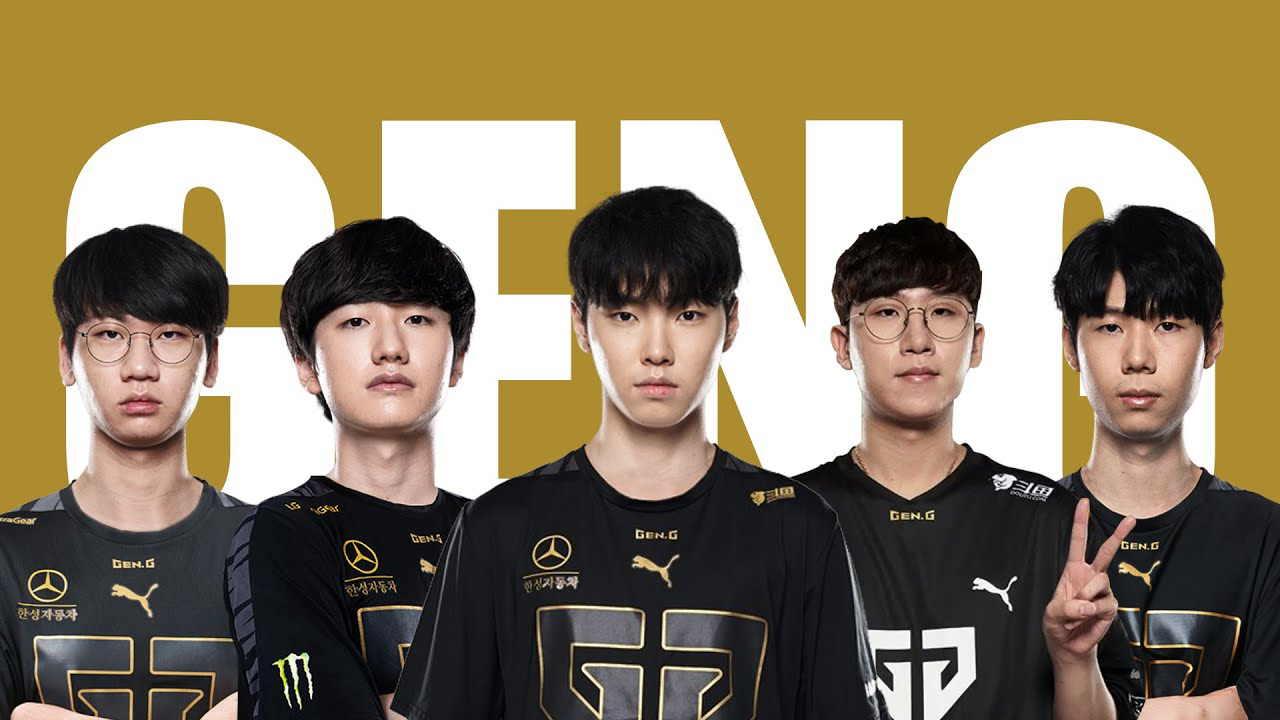

In [5]:
image_url = 'https://i.ytimg.com/vi/Ghn9VaAO2jU/maxresdefault.jpg'
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [14]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'returnFaceID': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'accessories,smile'
    }

In [7]:
data = {'url':image_url}

In [15]:
response = requests.post(face_api_url,headers=headers,params=params,json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 279, 'left': 585, 'width': 142, 'height': 142},
  'faceAttributes': {'smile': 0.0, 'accessories': []}},
 {'faceRectangle': {'top': 283, 'left': 320, 'width': 137, 'height': 137},
  'faceAttributes': {'smile': 0.0, 'accessories': []}},
 {'faceRectangle': {'top': 292, 'left': 1071, 'width': 137, 'height': 137},
  'faceAttributes': {'smile': 0.0, 'accessories': []}},
 {'faceRectangle': {'top': 298, 'left': 71, 'width': 137, 'height': 137},
  'faceAttributes': {'smile': 0.0,
   'accessories': [{'type': 'glasses', 'confidence': 0.98}]}},
 {'faceRectangle': {'top': 280, 'left': 854, 'width': 125, 'height': 125},
  'faceAttributes': {'smile': 0.004,
   'accessories': [{'type': 'glasses', 'confidence': 0.96}]}}]

In [16]:
draw = ImageDraw.Draw(image)

In [23]:
def DrawBox(faces):
    for face in faces:
        rect = face['faceRectangle']
        left = rect['left']
        top = rect['top']
        width = rect['width']
        height = rect['height']

        draw.rectangle(((left,top),(left+width,top+height)),outline='red')

        face_attributes = face['faceAttributes']
        smile = face_attributes['smile']
        draw.text((left,top),str(smile),fill='red')

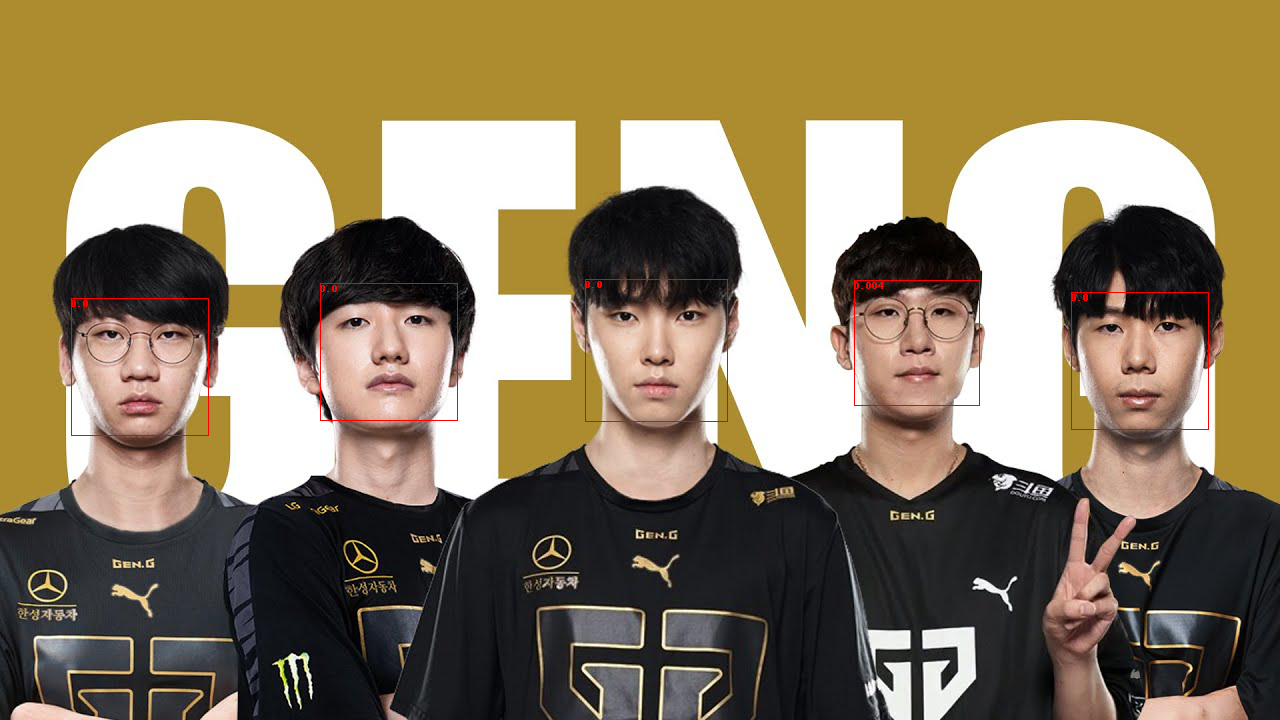

In [24]:
DrawBox(faces)
image